In [1]:
library(dplyr)
library(lme4)
library(nlme)
library(purrr)
library(performance)
library(tibble)
library(MuMIn)
library(here)
library(reactablefmtr)
library(reactable)
library(emmeans)
library(car)
library(ggplot2)
library(modelr)
library(knitr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


The following object is masked from ‘package:dplyr’:

    collapse


here() starts at /home/ecamo19/Documents/projects/nutrients_and_water_effects_2022/shade_house_reproducible_stats

Loading required package: reactable

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘ggplot2’


The following object is masked from ‘package:reactablefmtr’:

    margin



Attaching package: ‘modelr’


The following objects are masked from ‘package:performance’:

    mae, mse, rmse




In [3]:
setwd(here::here())

In [4]:
# Load all joined dataset
source("./scripts/code_join_data_full_dataset.R")

# Step was done like this because I am working with a subset of the data
# source cleaned data
source("./scripts/code_clean_data_nodules.R")


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
# Load custom made functions
source("./R/functions_models.R")
source("./R/function_plots.R")
source("./R/function_validation_plots.R")
source("./R/function_for_inference_emmeans_and_percentage_diff.R")


In [33]:
# set plot dimensions
options(repr.plot.width = 20)
options(repr.plot.height = 10)

# __Run each piece of code with shift + Enter__

# __Q2:How does increased nutrient and/or water availability influence seedling water and nutrient-use traits and the relationships with N-fixing bacteria?__

## Models

### Traits

In [6]:
# Take response variables names
response_vars_q2 <-

  set_names(c("amax", "gs","sla"))

In [7]:
models_q2 <- map(response_vars_q2, ~mixed_model_1(response = .x,
                                                data = data_for_models))



In [13]:
## PNUE
model_q2_pnue_log <- lmer(log(pnue) ~ nfixer*treatment +
                                                   init_height +
                                                   (1|spcode),
                         data = data_for_models)

model_q2_pnue_log <- list(model_q2_pnue_log)

names(model_q2_pnue_log) <- "pnue_log"

In [14]:
## Narea_g_m2 log model
model_q2_n_area_log <- lmer(log(narea_g_m2) ~ nfixer*treatment +
                                                   init_height +
                                                   (1|spcode),
                         data = data_for_models)

model_q2_n_area_log <- list(model_q2_n_area_log)

names(model_q2_n_area_log) <- "n_area_log"

In [15]:
## WUE log model
model_q2_wue_log <- lmer(log(wue) ~ nfixer*treatment +
                                        init_height +
                                        (1|spcode),
                         data = data_for_models)

model_q2_wue_log <- list(model_q2_wue_log)

names(model_q2_wue_log) <- "wue_log"

### Nodule count 

In [16]:
# Delete unused variables
data_nodules_cleaned <-
    data_nodules_cleaned %>%

        # add id to rownames for keep track of the rows
        column_to_rownames("id") %>%
        dplyr::select(spcode, treatment, everything())

ERROR: [1m[33mError[39m in `column_to_rownames()`:[22m
[1m[22m[33m![39m `.data` must be a data frame without row names.


In [17]:
nlme_nodule_log_weights <- lme(log(number_of_root_nodulation) ~ treatment + init_height,
                                    random = ~1|spcode,
                                    weights = varIdent(form = ~1|spcode),
                                    data = data_nodules_cleaned)


model_q2_nodule_log <- list(nlme_nodule_log_weights)

names(model_q2_nodule_log) <- "nodule_log"

In [18]:
# Append log models to model list
models_q2 <- append(model_q2_n_area_log, models_q2)
models_q2 <- append(model_q2_pnue_log, models_q2)
models_q2 <- append(model_q2_wue_log, models_q2)
models_q2 <- append(model_q2_nodule_log, models_q2)

In [19]:
names(models_q2)

[1] "nodule_log" "wue_log"    "pnue_log"   "n_area_log" "n_area_log"
[6] "amax"       "gs"         "sla"

## Model Assumptions

### Maximal photosynthesis

[1] "No variable specified inthe variables argument"


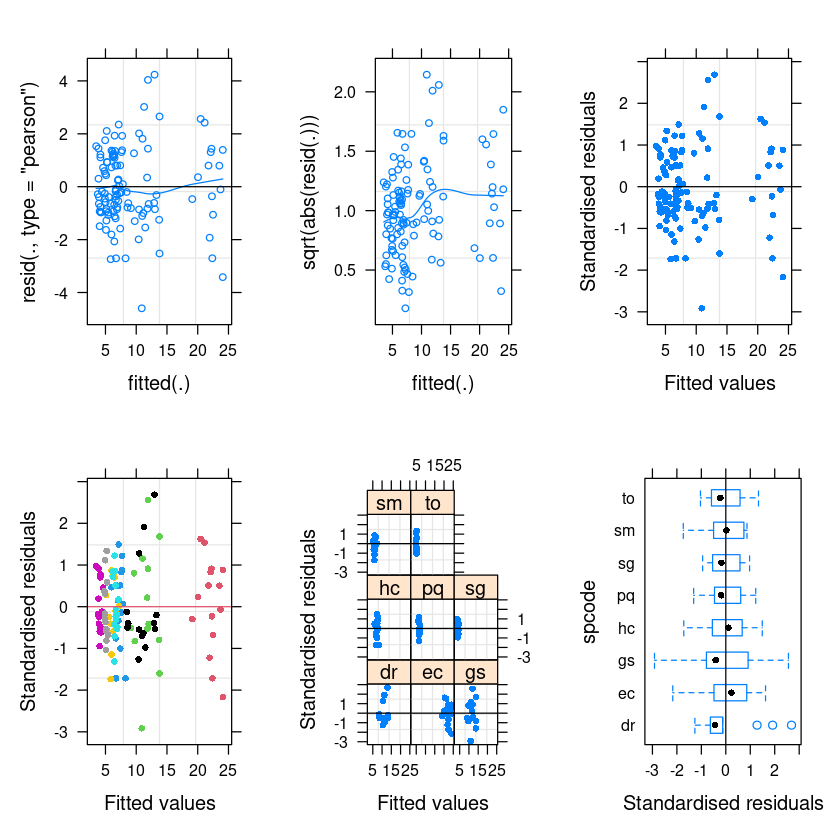

In [20]:
par(mfrow = c(3,3))
validation_plots(models_q2$amax, data = data_for_models,group = "spcode")

### Stomatal Conductance

[1] "No variable specified inthe variables argument"


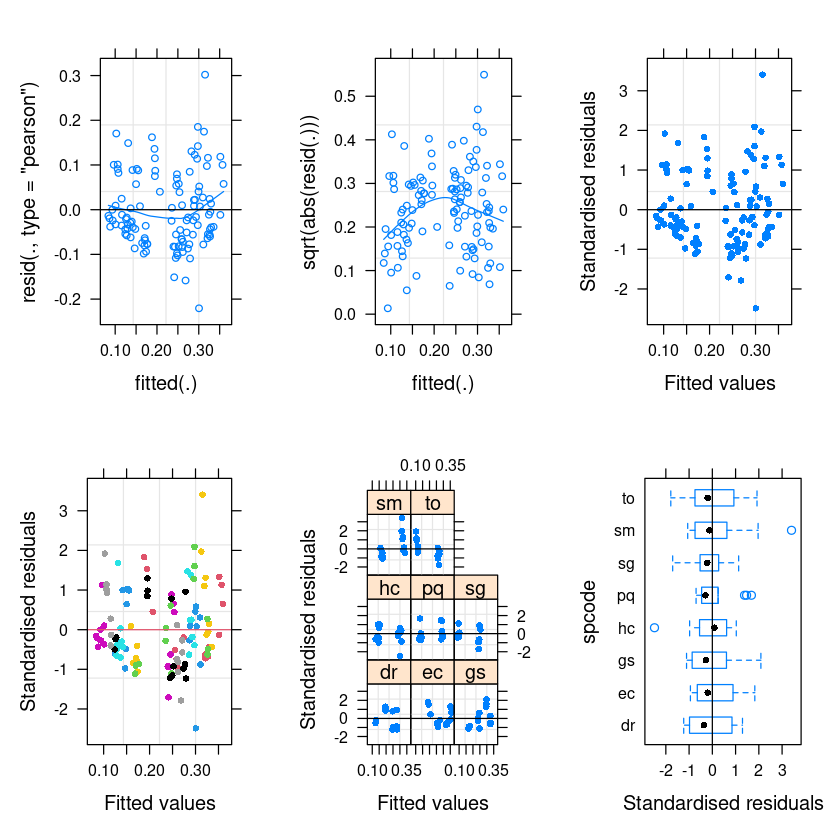

In [21]:
par(mfrow = c(3,3))
validation_plots(models_q2$gs, data = data_for_models,group = "spcode")

### Water Use Efficiency 

[1] "No variable specified inthe variables argument"


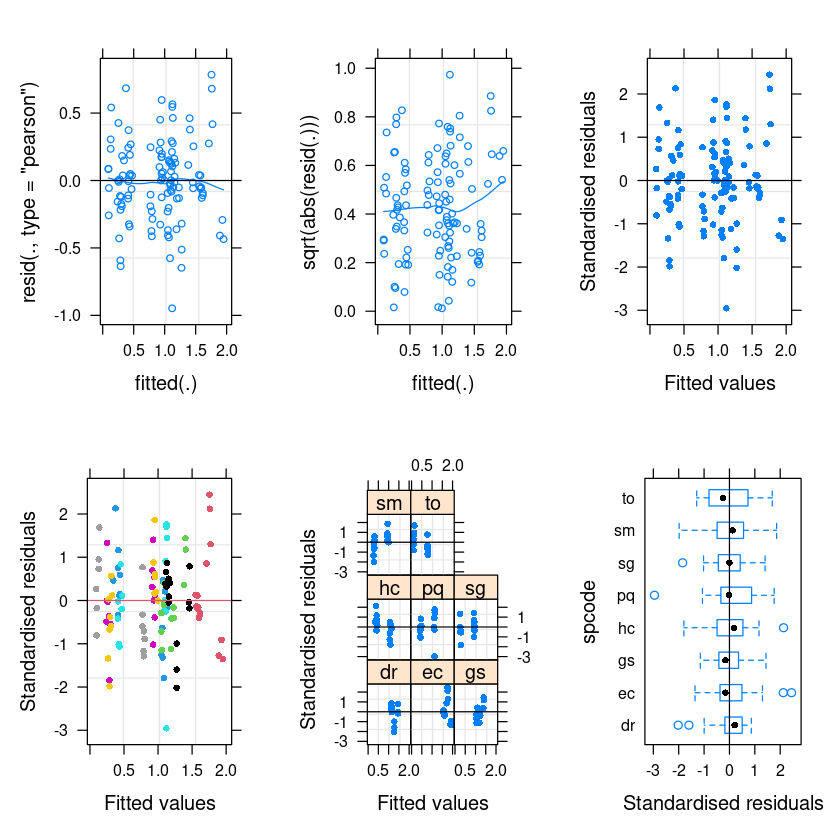

In [22]:
par(mfrow = c(3,3))
validation_plots(models_q2$wue_log, data = data_for_models,group = "spcode")

### SLA

[1] "No variable specified inthe variables argument"


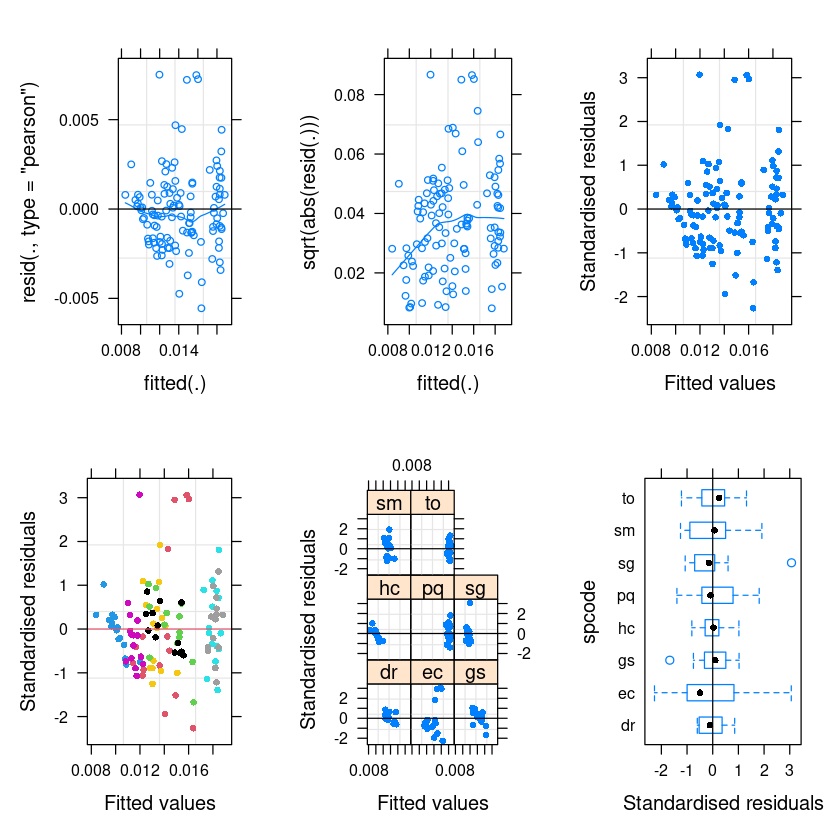

In [23]:
par(mfrow = c(3,3))
validation_plots(models_q2$sla, data = data_for_models,group = "spcode")

### PNUE

[1] "No variable specified inthe variables argument"


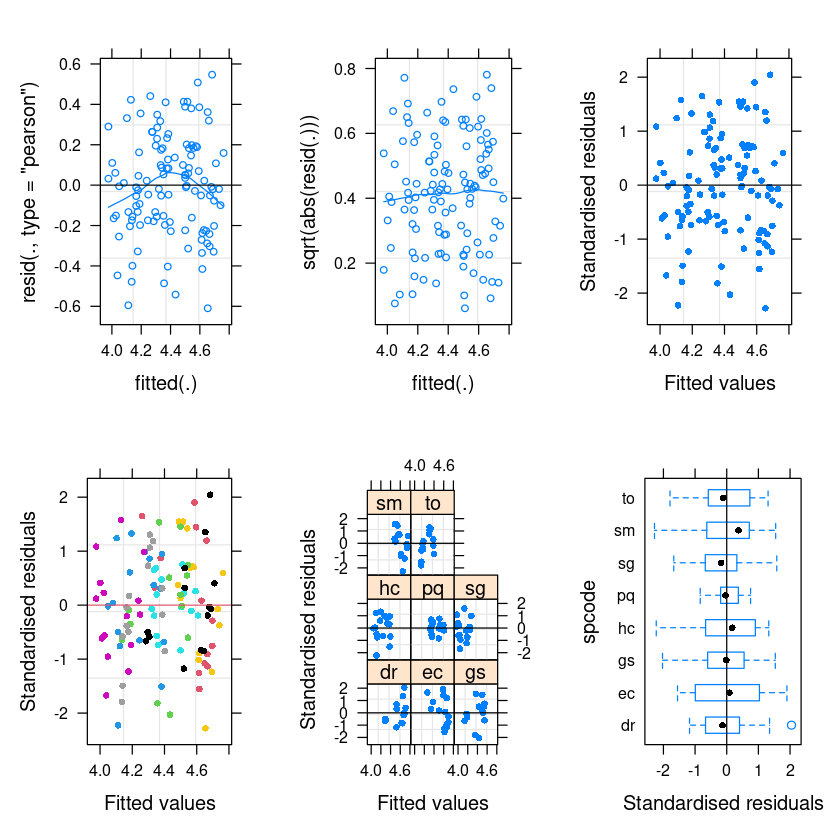

In [24]:
par(mfrow = c(3,3))
validation_plots(models_q2$pnue_log, data = data_for_models,group = "spcode")

### Nitrogen concentration per unit of area

[1] "No variable specified inthe variables argument"


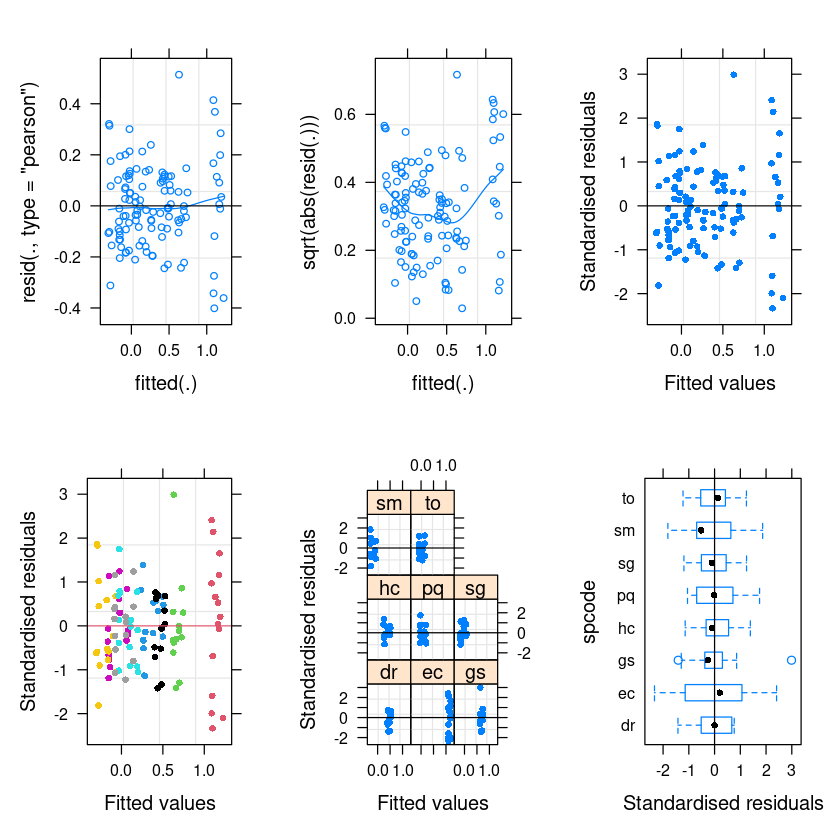

In [25]:
par(mfrow = c(3,3))
validation_plots(models_q2$n_area_log, data = data_for_models,group = "spcode")

### Nodule count

[1] "No variable specified inthe variables argument"


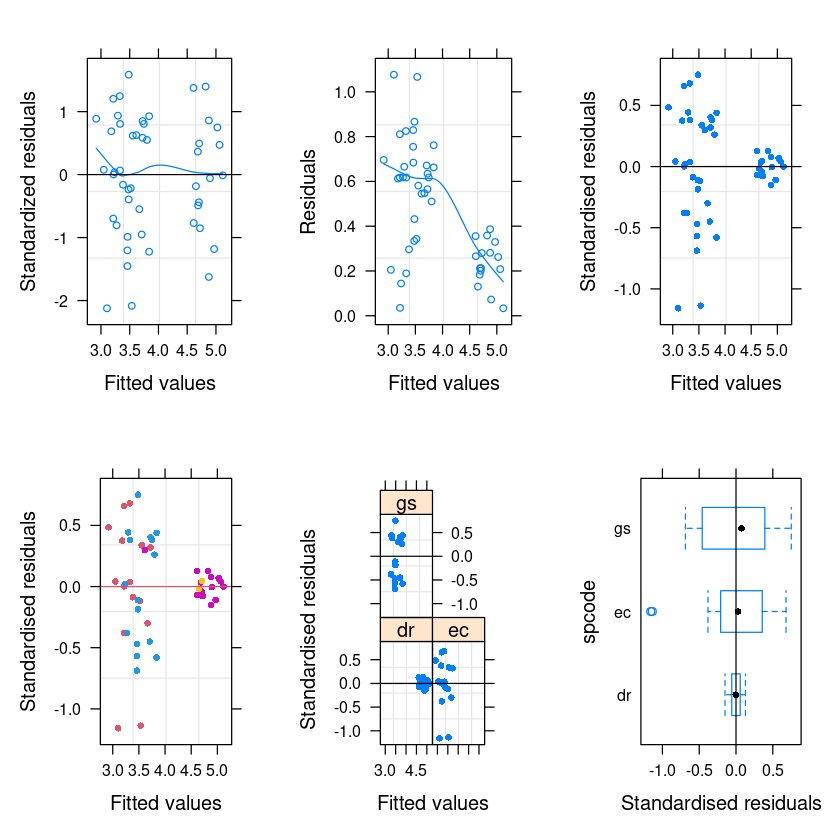

In [26]:
par(mfrow = c(3,3))
validation_plots(models_q2$nodule_log, data = data_for_models,group = "spcode")

## Model inference

In [28]:
## r2 models
models_q2 %>%
    map(., r2) %>%
    unlist()

nodule_log.R2_conditional.Conditional R2 
                              0.99210949 
      nodule_log.R2_marginal.Marginal R2 
                              0.05918329 
   wue_log.R2_conditional.Conditional R2 
                              0.71998191 
         wue_log.R2_marginal.Marginal R2 
                              0.55826930 
  pnue_log.R2_conditional.Conditional R2 
                              0.49403896 
        pnue_log.R2_marginal.Marginal R2 
                              0.19551642 
n_area_log.R2_conditional.Conditional R2 
                              0.86655502 
      n_area_log.R2_marginal.Marginal R2 
                              0.58167860 
n_area_log.R2_conditional.Conditional R2 
                              0.86655502 
      n_area_log.R2_marginal.Marginal R2 
                              0.58167860 
      amax.R2_conditional.Conditional R2 
                              0.94110209 
            amax.R2_marginal.Marginal R2 
                              0.49634925 
        gs.R2_conditional.Conditional R2 
                              0.46868890 
              gs.R2_marginal.Marginal R2 
                              0.39313270 
       sla.R2_conditional.Conditional R2 
                              0.58102163 
             sla.R2_marginal.Marginal R2 
                              0.16972855

### Anova tables

In [29]:
map(models_q2, ~Anova(.x, type = "III", test.statistic = c("F")))

$nodule_log
Analysis of Deviance Table (Type III tests)

Response: log(number_of_root_nodulation)
              Chisq Df Pr(>Chisq)    
(Intercept) 27.5271  1  1.549e-07 ***
treatment   33.9910  3  1.990e-07 ***
init_height  5.3594  1    0.02061 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$wue_log
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: log(wue)
                       F Df  Df.res    Pr(>F)    
(Intercept)      33.4628  1  13.769 5.050e-05 ***
nfixer            4.0850  1   9.061  0.073774 .  
treatment        26.8453  3 102.585 6.753e-13 ***
init_height       0.3386  1  28.234  0.565258    
nfixer:treatment  4.6623  3 102.433  0.004275 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$pnue_log
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: log(pnue)
                        F Df  Df.res    Pr(>F)    
(Intercept)      872.5863  1  13.768 7.524e-14 ***
nfixer             0.5166  1   8.992   0.49054    
treatment          3.6223  3 102.579   0.01561 *  
init_height        1.8313  1  28.809   0.18650    
nfixer:treatment   1.7856  3 102.427   0.15460    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$n_area_log
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: log(narea_g_m2)
                       F Df  Df.res    Pr(>F)    
(Intercept)       0.5883  1  11.181 0.4589603    
nfixer           15.9628  1   6.753 0.0056182 ** 
treatment         7.3650  3 102.260 0.0001618 ***
init_height       0.5198  1  84.673 0.4728932    
nfixer:treatment  2.3843  3 102.167 0.0736043 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$n_area_log
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: log(narea_g_m2)
                       F Df  Df.res    Pr(>F)    
(Intercept)       0.5883  1  11.181 0.4589603    
nfixer           15.9628  1   6.753 0.0056182 ** 
treatment         7.3650  3 102.260 0.0001618 ***
init_height       0.5198  1  84.673 0.4728932    
nfixer:treatment  2.3843  3 102.167 0.0736043 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$amax
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: amax
                       F Df  Df.res    Pr(>F)    
(Intercept)      12.3075  1   7.859 0.0082101 ** 
treatment         0.2570  3 102.089 0.8561844    
nfixer            7.9692  1   6.202 0.0291755 *  
init_height       5.3512  1 107.997 0.0226019 *  
treatment:nfixer  7.3837  3 102.053 0.0001585 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$gs
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: gs
                       F Df  Df.res    Pr(>F)    
(Intercept)       8.1567  1  13.303   0.01324 *  
treatment        18.6434  3 102.924 9.827e-10 ***
nfixer            6.3961  1  18.189   0.02089 *  
init_height       0.8571  1  10.438   0.37547    
treatment:nfixer  1.6952  3 102.823   0.17270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$sla
Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df)

Response: sla
                        F Df  Df.res    Pr(>F)    
(Intercept)      111.1196  1  13.316 7.778e-08 ***
treatment          0.2492  3 102.441   0.86176    
nfixer             0.4345  1   7.732   0.52893    
init_height        5.4331  1  46.890   0.02411 *  
treatment:nfixer   1.7986  3 102.305   0.15215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
anova.lme(models_q2$nodule_log, type = "marginal")

numDF denDF F-value   p-value     
(Intercept) 1     41    27.527073 5.056819e-06
treatment   3     41    11.330325 1.515061e-05
init_height 1     41     5.359407 2.569362e-02

### Post-Hoc: Tukey's test

#### Maximal photosynthesis

In [31]:
as_tibble(emmeans(models_q2$amax,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(2:6, round, 6)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


contrast                                                   estimate  
1  no_additions nonfixer - plus_nutrients nonfixer             -0.128657
2  no_additions nonfixer - plus_water nonfixer                 -0.431035
3  no_additions nonfixer - plus_water_nutrients nonfixer       -0.071649
4  no_additions nonfixer - no_additions fixer                  -9.088761
5  no_additions nonfixer - plus_nutrients fixer                -7.019938
6  no_additions nonfixer - plus_water fixer                   -11.422974
7  no_additions nonfixer - plus_water_nutrients fixer          -9.783426
8  plus_nutrients nonfixer - plus_water nonfixer               -0.302379
9  plus_nutrients nonfixer - plus_water_nutrients nonfixer      0.057007
10 plus_nutrients nonfixer - no_additions fixer                -8.960104
11 plus_nutrients nonfixer - plus_nutrients fixer              -6.891282
12 plus_nutrients nonfixer - plus_water fixer                 -11.294317
13 plus_nutrients nonfixer - plus_water_nutrients fixer        -9.654769
14 plus_water nonfixer - plus_water_nutrients nonfixer          0.359386
15 plus_water nonfixer - no_additions fixer                    -8.657726
16 plus_water nonfixer - plus_nutrients fixer                  -6.588903
17 plus_water nonfixer - plus_water fixer                     -10.991939
18 plus_water nonfixer - plus_water_nutrients fixer            -9.352391
19 plus_water_nutrients nonfixer - no_additions fixer          -9.017111
20 plus_water_nutrients nonfixer - plus_nutrients fixer        -6.948289
21 plus_water_nutrients nonfixer - plus_water fixer           -11.351324
22 plus_water_nutrients nonfixer - plus_water_nutrients fixer  -9.711776
23 no_additions fixer - plus_nutrients fixer                    2.068822
24 no_additions fixer - plus_water fixer                       -2.334213
25 no_additions fixer - plus_water_nutrients fixer             -0.694665
26 plus_nutrients fixer - plus_water fixer                     -4.403035
27 plus_nutrients fixer - plus_water_nutrients fixer           -2.763487
28 plus_water fixer - plus_water_nutrients fixer                1.639548
   SE       df         t.ratio   p.value 
1  0.515765 102.144768 -0.249448 0.999997
2  0.520791 102.004653 -0.827655 0.991131
3  0.498836 102.014215 -0.143633 1.000000
4  3.219559   6.201600 -2.822983 0.238193
5  3.226719   6.257198 -2.175565 0.461776
6  3.220218   6.206143 -3.547267 0.108377
7  3.222881   6.224767 -3.035615 0.188810
8  0.538011 102.126656 -0.562031 0.999222
9  0.517720 102.230398  0.110112 1.000000
10 3.223228   6.228837 -2.779854 0.248987
11 3.229612   6.279109 -2.133780 0.480115
12 3.224387   6.236824 -3.502780 0.113204
13 3.228245   6.263877 -2.990717 0.197551
14 0.520875 102.018773  0.689965 0.997103
15 3.222981   6.227932 -2.686248 0.275199
16 3.230208   6.284252 -2.039777 0.523363
17 3.223590   6.232098 -3.409843 0.125355
18 3.226134   6.249815 -2.898947 0.218584
19 3.219317   6.199890 -2.800940 0.243931
20 3.226703   6.257084 -2.153371 0.471576
21 3.219828   6.203421 -3.525444 0.111016
22 3.222139   6.219573 -3.014078 0.193389
23 0.710785 102.043108  2.910617 0.081045
24 0.675202 102.044341 -3.457059 0.017509
25 0.681949 102.276898 -1.018646 0.970608
26 0.713296 102.130458 -6.172803 0.000000
27 0.724119 102.452896 -3.816344 0.005499
28 0.675984 102.123919  2.425424 0.240556

In [32]:
# Treatment effects
emmeans_table_tidy(models_q2$amax,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x64c4fc6e65b0>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

#### Water Use Efficiency

In [33]:
as_tibble(emmeans(models_q2$wue_log,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

contrast                                                   estimate 
1  no_additions nonfixer - plus_nutrients nonfixer             0.022672
2  no_additions nonfixer - plus_water nonfixer                 0.658058
3  no_additions nonfixer - plus_water_nutrients nonfixer       0.694960
4  no_additions nonfixer - no_additions fixer                 -0.434992
5  no_additions nonfixer - plus_nutrients fixer               -0.611355
6  no_additions nonfixer - plus_water fixer                   -0.309838
7  no_additions nonfixer - plus_water_nutrients fixer         -0.277940
8  plus_nutrients nonfixer - plus_water nonfixer               0.635386
9  plus_nutrients nonfixer - plus_water_nutrients nonfixer     0.672288
10 plus_nutrients nonfixer - no_additions fixer               -0.457664
11 plus_nutrients nonfixer - plus_nutrients fixer             -0.634027
12 plus_nutrients nonfixer - plus_water fixer                 -0.332510
13 plus_nutrients nonfixer - plus_water_nutrients fixer       -0.300612
14 plus_water nonfixer - plus_water_nutrients nonfixer         0.036902
15 plus_water nonfixer - no_additions fixer                   -1.093050
16 plus_water nonfixer - plus_nutrients fixer                 -1.269413
17 plus_water nonfixer - plus_water fixer                     -0.967896
18 plus_water nonfixer - plus_water_nutrients fixer           -0.935998
19 plus_water_nutrients nonfixer - no_additions fixer         -1.129952
20 plus_water_nutrients nonfixer - plus_nutrients fixer       -1.306315
21 plus_water_nutrients nonfixer - plus_water fixer           -1.004798
22 plus_water_nutrients nonfixer - plus_water_nutrients fixer -0.972900
23 no_additions fixer - plus_nutrients fixer                  -0.176363
24 no_additions fixer - plus_water fixer                       0.125153
25 no_additions fixer - plus_water_nutrients fixer             0.157052
26 plus_nutrients fixer - plus_water fixer                     0.301517
27 plus_nutrients fixer - plus_water_nutrients fixer           0.333415
28 plus_water fixer - plus_water_nutrients fixer               0.031898
   SE       df         t.ratio   p.value 
1  0.104732 102.853047  0.216478 0.999999
2  0.105942 102.180123  6.211482 0.000000
3  0.101462 102.212724  6.849442 0.000000
4  0.215220   9.060734 -2.021147 0.516685
5  0.219685   9.843645 -2.782872 0.203026
6  0.215497   9.072601 -1.437787 0.820654
7  0.216668   9.146245 -1.282789 0.884976
8  0.109279 102.801769  5.814347 0.000002
9  0.105012 103.243319  6.402003 0.000000
10 0.217226   9.327074 -2.106858 0.471714
11 0.221313  10.094171 -2.864848 0.179328
12 0.217700   9.344990 -1.527380 0.778384
13 0.219372   9.446508 -1.370332 0.850832
14 0.105940 102.247269  0.348329 0.999968
15 0.217320   9.408306 -5.029677 0.009162
16 0.221794  10.216480 -5.723388 0.002883
17 0.217560   9.414622 -4.448869 0.020131
18 0.218640   9.471203 -4.281005 0.025168
19 0.215109   9.052354 -5.252926 0.007553
20 0.219678   9.843192 -5.946505 0.002433
21 0.215325   9.061860 -4.666432 0.016138
22 0.216342   9.125720 -4.497041 0.019971
23 0.144522 102.374944 -1.220319 0.924093
24 0.137294 102.447757  0.911570 0.984329
25 0.138248 103.506878  1.136016 0.947258
26 0.144870 102.786364  2.081291 0.433884
27 0.146446 104.213061  2.276707 0.316384
28 0.137300 102.728397  0.232325 0.999998

In [34]:
# Treatment effects
emmeans_table_tidy(models_q2$wue_log,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x64c4fd441d50>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

#### Stomatal Conductance

In [35]:
as_tibble(emmeans(models_q2$gs,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()

NOTE: Results may be misleading due to involvement in interactions





|contrast                              |  estimate|       SE|       df|   t.ratio|  p.value|
|:-------------------------------------|---------:|--------:|--------:|---------:|--------:|
|no_additions - plus_nutrients         |  0.028169| 0.024675| 103.1872|  1.141632| 0.664720|
|no_additions - plus_water             | -0.124503| 0.023967| 102.8730| -5.194720| 0.000006|
|no_additions - plus_water_nutrients   | -0.104146| 0.023656| 103.6711| -4.402501| 0.000152|
|plus_nutrients - plus_water           | -0.152673| 0.025095| 103.6233| -6.083662| 0.000000|
|plus_nutrients - plus_water_nutrients | -0.132315| 0.024881| 105.1614| -5.318026| 0.000004|
|plus_water - plus_water_nutrients     |  0.020357| 0.023939| 102.9949|  0.850390| 0.830145|

In [36]:
# Treatment effects
emmeans_table_tidy(models_q2$gs,
                        formula = "treatment",
                        )

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment
<environment: 0x64c4fa5379e8>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
NOTE: Results may be misleading due to involvement in interactions



HTML widgets cannot be represented in plain text (need html)

#### PNUE

In [37]:
as_tibble(emmeans(models_q2$pnue_log,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()

NOTE: Results may be misleading due to involvement in interactions





|contrast                              |  estimate|       SE|       df|   t.ratio|  p.value|
|:-------------------------------------|---------:|--------:|--------:|---------:|--------:|
|no_additions - plus_nutrients         |  0.209954| 0.074530| 102.8499|  2.817028| 0.029219|
|no_additions - plus_water             | -0.114851| 0.072262| 102.3442| -1.589381| 0.389200|
|no_additions - plus_water_nutrients   |  0.007941| 0.071556| 103.2895|  0.110981| 0.999508|
|plus_nutrients - plus_water           | -0.324805| 0.075914| 103.2916| -4.278579| 0.000244|
|plus_nutrients - plus_water_nutrients | -0.202012| 0.075773| 105.0121| -2.666025| 0.043418|
|plus_water - plus_water_nutrients     |  0.122793| 0.072285| 102.7313|  1.698726| 0.329644|

In [38]:
# Treatment effects
emmeans_table_tidy(models_q2$pnue_log,
                        formula = "treatment",
                        )

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment
<environment: 0x64c4fa7d4700>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
NOTE: Results may be misleading due to involvement in interactions



HTML widgets cannot be represented in plain text (need html)

#### Nitrogen concentration per unit of area

In [ ]:
as_tibble(emmeans(models_q2$n_area_log,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()

In [ ]:
# Treatment effects
emmeans_table_tidy(models_q2$n_area_log,
                        formula = "treatment",
                        )

In [40]:
as_tibble(emmeans(models_q2$n_area_log,
        pairwise ~ nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

NOTE: Results may be misleading due to involvement in interactions



contrast         estimate  SE       df       t.ratio   p.value 
1 nonfixer - fixer -0.721388 0.186654 5.715075 -3.864845 0.009136

In [42]:
as.data.frame(emmeans::emmeans(models_q2$n_area_log,
                                specs = pairwise ~nfixer,
                                type = "response",
                                adjust = "tukey")$emmeans) %>%

        janitor::clean_names() %>%
        dplyr::select(response, everything(),
                        # Remove variables
                      -c(df, lower_cl, upper_cl, se)) %>%

        # Rename response to emmean, this is done when models is log
        dplyr::rename_all(funs(stringr::str_replace_all(., "response", "emmean"))) %>%

        # Calculate % difference between control and variable, this assume that
        # that first name is the control

        dplyr::mutate(difference = ((emmean - first(emmean))),
               perc_difference =((emmean - first(emmean) )/first(emmean))*100) %>%

        dplyr::mutate_if(is.numeric, round, 3)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


NOTE: Results may be misleading due to involvement in interactions



emmean nfixer   difference perc_difference
1 1.037  nonfixer 0.000        0.000        
2 2.133  fixer    1.096      105.729

#### Nodule Count

In [43]:
as_tibble(emmeans(models_q2$nodule_log,
        pairwise ~ treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

contrast                                            estimate  SE       df
1 ambientrain - ambientrain_nutrients                  0.168648 0.064247 41
2 ambientrain - ambientrain_water                      0.116467 0.068880 41
3 ambientrain - ambientrain_water_nutrients           -0.185805 0.062976 41
4 ambientrain_nutrients - ambientrain_water           -0.052181 0.064750 41
5 ambientrain_nutrients - ambientrain_water_nutrients -0.354452 0.063957 41
6 ambientrain_water - ambientrain_water_nutrients     -0.302272 0.068268 41
  t.ratio   p.value 
1  2.624984 0.056480
2  1.690864 0.341466
3 -2.950424 0.025831
4 -0.805885 0.851284
5 -5.542023 0.000011
6 -4.427689 0.000389

In [44]:
# Treatment effects
emmeans_table_tidy(models_q2$nodule_log,
                        formula = "treatment")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment
<environment: 0x64c501c0c930>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


HTML widgets cannot be represented in plain text (need html)

## Boxplot traits 

In [45]:
# Step done for getting predictions from models for Q2
data_for_predictions <-
    data_for_models %>%

        rownames_to_column("id") %>%

        # Remove unused variables
        dplyr::select(id, spcode, treatment, nfixer, init_height)

In [46]:
string <- c("models_q2")

data_pred_traits <-

        # Get models prediction
        gather_predictions(data_for_predictions ,

                           # Return predictions
                            models_q2$amax,
                            models_q2$wue_log,
                            models_q2$sla,
                            models_q2$gs,
                            models_q2$pnue,
                            models_q2$n_area_log

                            ) %>%

        pivot_wider(names_from = model, values_from = pred) %>%
            rename_all(funs(

                # rename columns
                stringr::str_to_lower(.) %>%
                stringr::str_replace(., c(string),"pred_") %>%

                # Remove dollar sing
                gsub("\\$", "", .)
                )) %>%

        # Back transform log variables
        mutate(pred_wue = exp(pred_wue_log),
                pred_n_area = exp(pred_n_area_log)

            ) %>%

        # Remove log predictions and init height
        dplyr::select(-c(init_height, pred_wue_log,pred_n_area_log))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [47]:
# Generate plot combinations

vars_q2_interaction <-

  crossing(

    # Get all numeric variables to plot (all y)
    as_tibble(t(combn(dplyr::select(data_pred_traits, where(is.numeric)) %>% names, 1))),

    # Select factor variables to plot
    x_axis_var = dplyr::select(data_pred_traits, nfixer) %>%  names,
    group_var = dplyr::select(data_pred_traits, treatment) %>%  names) %>%

    filter(V1 %in% c('pred_amax', 'pred_wue'))

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


[[1]]

[[2]]


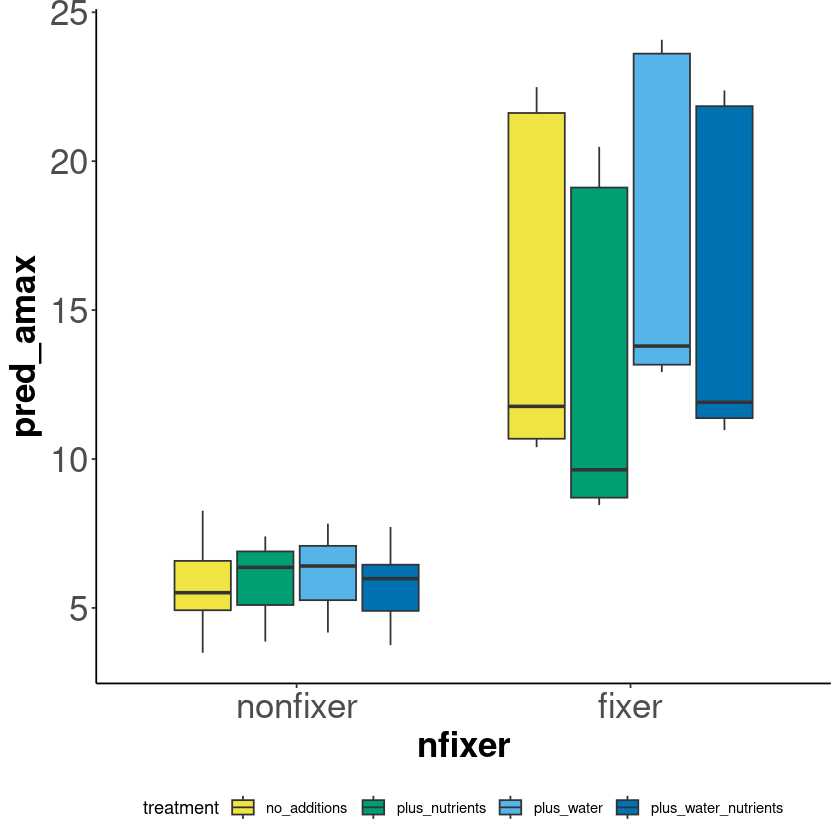

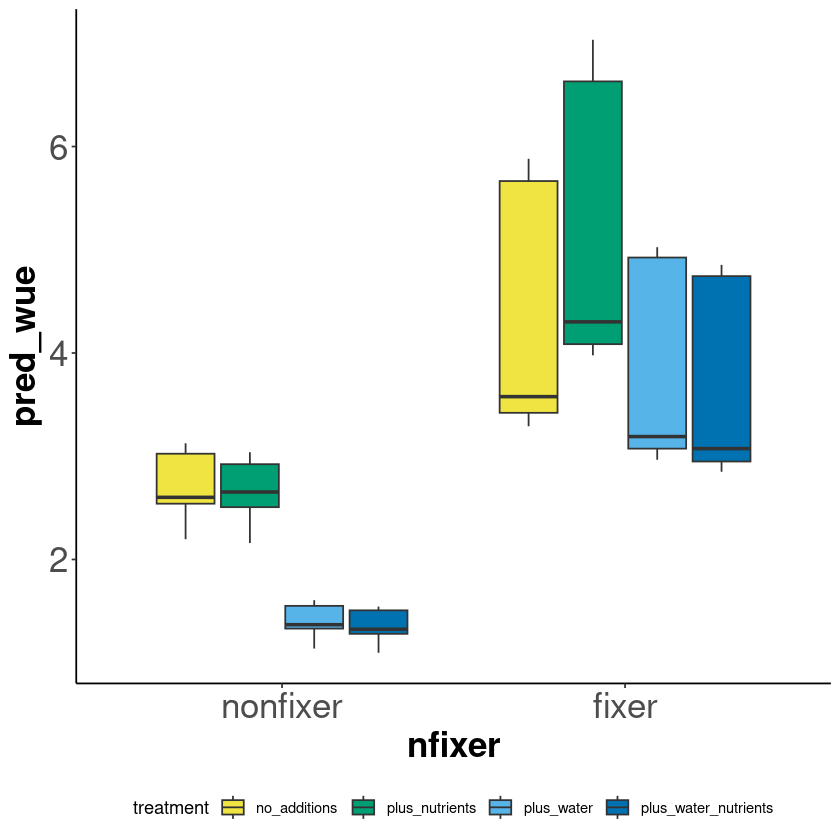

In [49]:
vars_q2_interaction %>%
      # Gererate plots
      pmap( ~ boxplot_plot_pmap(data = data_pred_traits,
                                y = !!sym(..1), x = !!sym(..2),
                                fill = !!sym(..3)))


In [50]:
vars_q2_treatment <-

  crossing(

    # Get all numeric variables to plot (all y)
    as_tibble(t(combn(dplyr::select(data_pred_traits, where(is.numeric)) %>% names, 1))),

    # Select factor variables to plot
    x_axis_var = dplyr::select(data_pred_traits, treatment) %>%  names,
    group_var = dplyr::select(data_pred_traits, treatment) %>%  names) %>%

    filter(V1 %in% c('pred_gs', 'pred_n_area'))

[[1]]

[[2]]


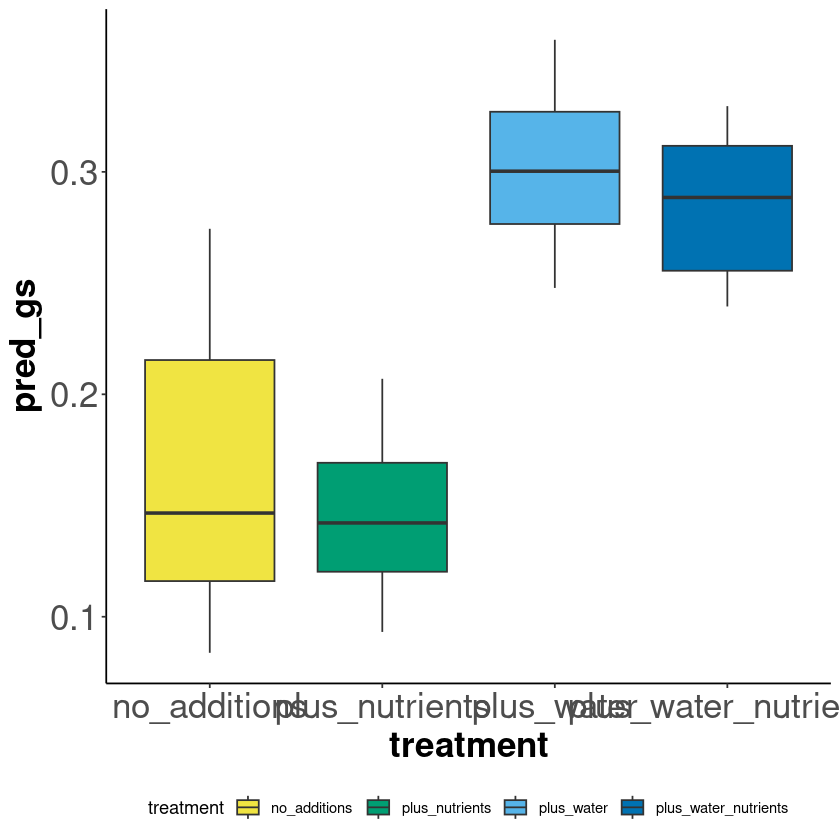

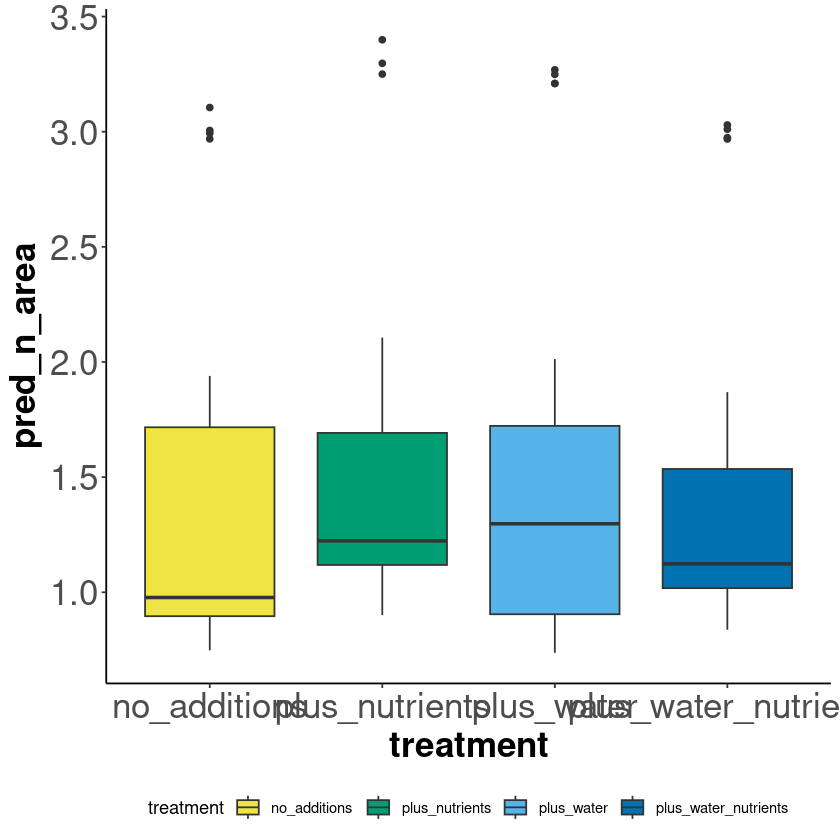

In [52]:
vars_q2_treatment %>%
      # Gererate plots
      pmap( ~ boxplot_plot_pmap(data = data_pred_traits,
                                y = !!sym(..1), x = !!sym(..2),
                                fill = !!sym(..3)))